In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset .csv')

# Check for nulls and remove rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Convert to numeric in case of any data type issues
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Remove invalid coordinates
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Restaurant Name',
                        hover_data=['City', 'Cuisines', 'Aggregate rating'],
                        color='City',
                        zoom=3,
                        height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Geographical Distribution of Restaurants')
fig.show()


<ipython-input-3-a05f63ff5226>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




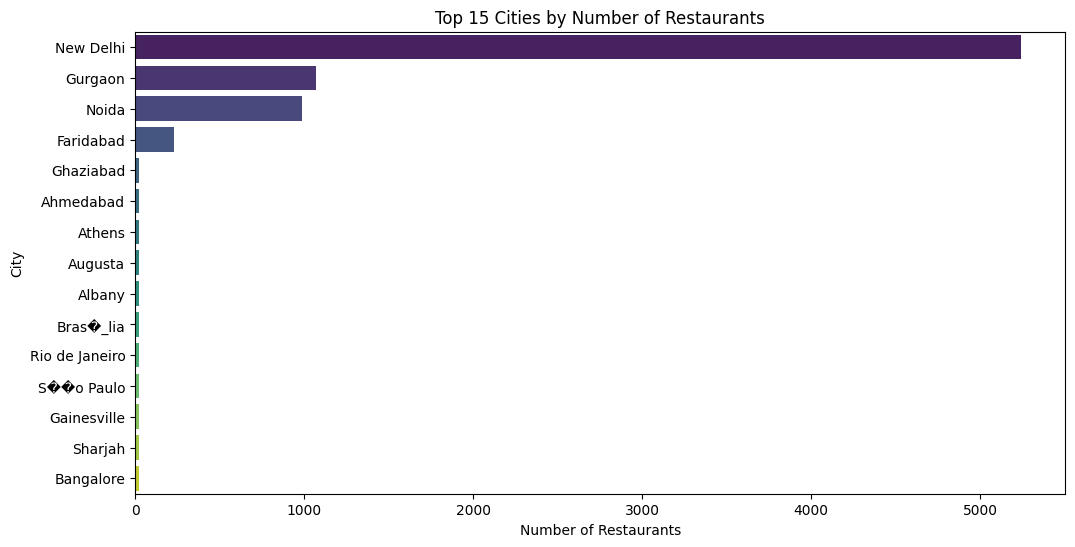

In [ ]:
# Group by city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Restaurants']

# Optional: visualize top cities
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='Number of Restaurants', y='City', data=city_counts.head(15), palette='viridis')
plt.title('Top 15 Cities by Number of Restaurants')
plt.show()


In [ ]:
print("City-wise Statistics")

city_stats = df.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).reset_index()

city_stats.columns = ['City', 'Number of Restaurants', 'Average Rating', 'Average Price Range']
city_stats = city_stats.sort_values(by='Number of Restaurants', ascending=False)

city_stats.head(10)


,City,Number of Restaurants,Average Rating,Average Price Range
88,New Delhi,5240,2.502061,1.632443
50,Gurgaon,1070,2.721963,1.881308
89,Noida,986,2.165112,1.627789
43,Faridabad,229,1.991703,1.475983
48,Ghaziabad,25,2.852000,1.800000
2,Ahmedabad,21,4.161905,2.571429
10,Augusta,20,4.130000,2.150000
23,Cedar Rapids/Iowa City,20,4.165000,2.050000
26,Chennai,20,4.315000,2.450000
0,Abu Dhabi,20,4.300000,3.300000


Available cities:
 ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland Station' 'Waterloo'
 'Weirton' 'Winchester Bay' 'Yorkton' 'Abu Dhabi' 'Dubai' 'Shar

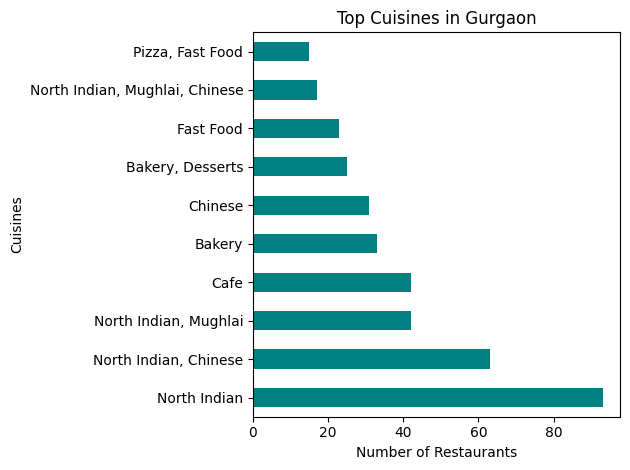

In [ ]:
import matplotlib.pyplot as plt

#user inout for city
print("Available cities:\n", df['City'].dropna().unique())
city_name = input("Enter the city name to analyze top cuisines: ").strip()

#filter df
if city_name in df['City'].unique():
    city_df = df[df['City'] == city_name]
    top_cuisines = city_df['Cuisines'].value_counts().head(10)

    top_cuisines.plot(kind='barh', title=f'Top Cuisines in {city_name}', color='teal')
    plt.xlabel('Number of Restaurants')
    plt.tight_layout()
    plt.show()
else:
    print(f"City '{city_name}' not found in the dataset.")

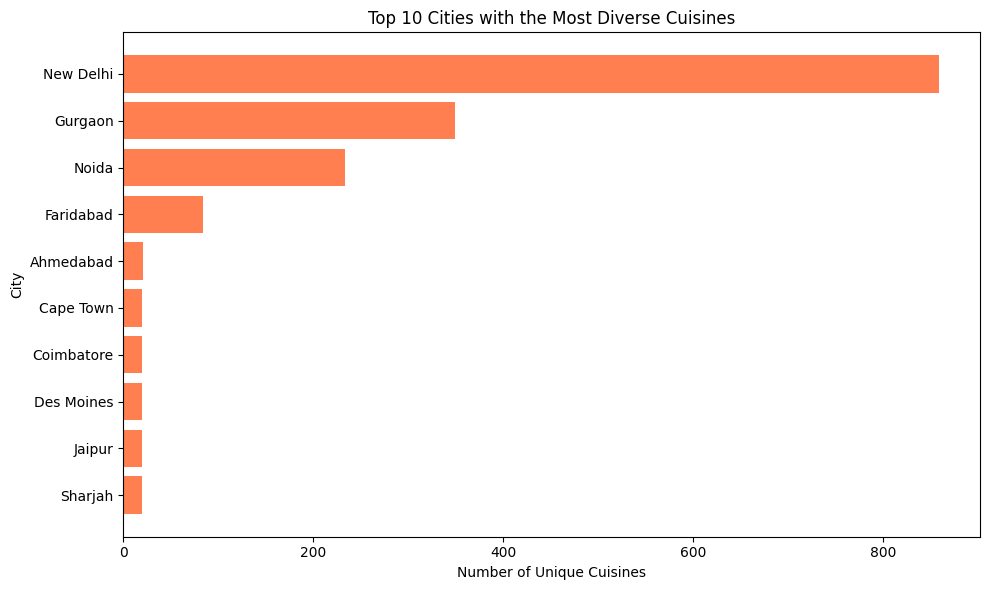

In [ ]:
import matplotlib.pyplot as plt

#top 10 cities with most unique cuisines
top_diverse_cities = cuisine_diversity.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_diverse_cities['City'], top_diverse_cities['Unique Cuisines'], color='coral')
plt.xlabel("Number of Unique Cuisines")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Diverse Cuisines")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
